## 1. Importing Dependencies 


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from datetime import datetime
import re
import warnings

warnings.filterwarnings('ignore')


-----------------------------------------------
## LOAD THE DATASET
-----------------------------------------------

In [12]:
df = pd.read_csv("../data/raw_analyst_ratings.csv")   # change filename
df.head()



,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


-----------------------------------------------
## DATA OVERVIEW
-----------------------------------------------

In [17]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

======================================================
# DESCRIPTIVE STATISTICS
======================================================

-----------------------------------------------
## Text Length Statistics
-----------------------------------------------

In [17]:
df['headline_length'] = df['headline'].astype(str).apply(len)
df['url_length'] = df['url'].astype(str).apply(len)

df[['headline_length', 'url_length']].describe()






,headline_length,url_length
count,1.407328e+06,1.407328e+06
mean,7.312051e+01,1.105045e+02
std,4.073531e+01,1.916913e+01
min,3.000000e+00,3.300000e+01
25%,4.700000e+01,9.400000e+01
50%,6.400000e+01,1.150000e+02
75%,8.700000e+01,1.250000e+02
max,5.120000e+02,1.620000e+02


-----------------------------------------------
## Articles Count per Publisher
-----------------------------------------------

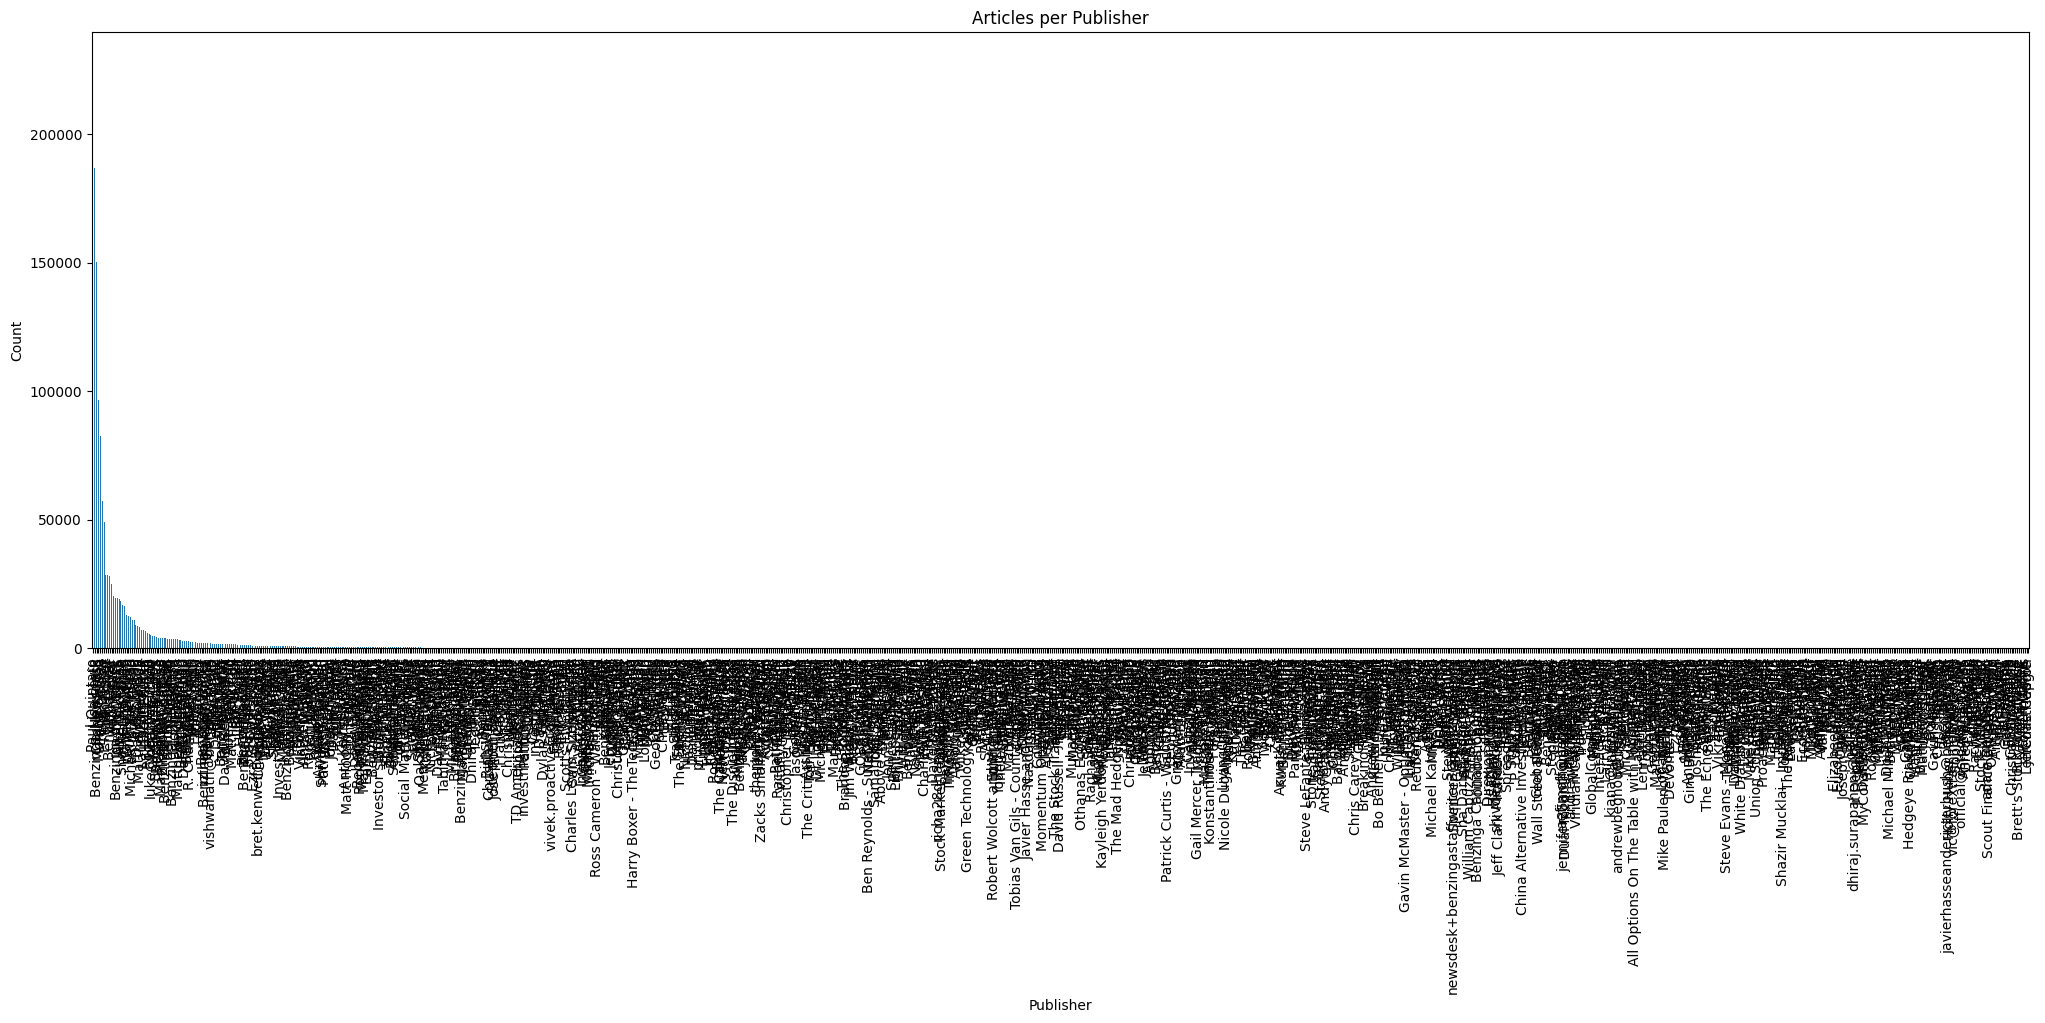

In [24]:
publisher_counts = df['publisher'].value_counts()
publisher_counts

#plotting the top 10 publishers
plt.figure(figsize=(25,8))
publisher_counts.plot(kind='bar')
plt.title("Articles per Publisher")
plt.xlabel("Publisher")
plt.ylabel("Count")
plt.show()


-----------------------------------------------
## Date Trends
-----------------------------------------------

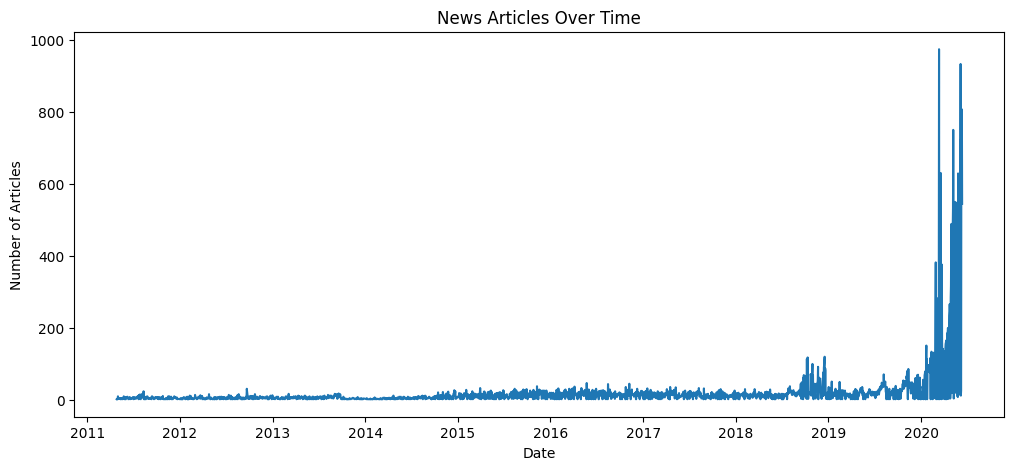

In [25]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
daily_counts = df.groupby(df['date'].dt.date).size()

plt.figure(figsize=(12,5))
daily_counts.plot()
plt.title("News Articles Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.show()


======================================================
# TEXT ANALYSIS (Topic Modeling)
======================================================

-----------------------------------------------
## Bag-of-Words (Word Frequency)
-----------------------------------------------

In [26]:
vectorizer = CountVectorizer(stop_words='english')
bow = vectorizer.fit_transform(df['headline'].astype(str))

word_freq = np.array(bow.sum(axis=0)).flatten()
words = vectorizer.get_feature_names_out()

freq_df = pd.DataFrame({'word': words, 'frequency': word_freq})
freq_df.sort_values(by='frequency', ascending=False).head(20)


,word,frequency
104259,vs,162099
93662,stocks,161776
40857,est,140604
40388,eps,128897
63981,market,120558
89240,shares,114313
83568,reports,108710
101800,update,91723
37999,earnings,87399
86676,sales,79645


-----------------------------------------------
## Topic Modeling (LDA)
-----------------------------------------------

In [14]:
import pandas as pd

df = pd.read_csv('../data/raw_analyst_ratings.csv')


import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer # 1. Import

# 2. Downloads
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# 3. Initialization (Must run after downloads)
stop_words = stopwords.words("english")
lemm = WordNetLemmatizer() 

# 4. Function Definition
def clean_text(text):
    # handle missing or non-string values
    if not isinstance(text, str):
        return ""
    
    text = text.lower()

    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha()]
    tokens = [lemm.lemmatize(t) for t in tokens]

    return " ".join(tokens)


# 5. Application
print(df["headline"].head(10))


0              Stocks That Hit 52-Week Highs On Friday
1           Stocks That Hit 52-Week Highs On Wednesday
2                        71 Biggest Movers From Friday
3         46 Stocks Moving In Friday's Mid-Day Session
4    B of A Securities Maintains Neutral on Agilent...
5    CFRA Maintains Hold on Agilent Technologies, L...
6    UBS Maintains Neutral on Agilent Technologies,...
7    Agilent Technologies shares are trading higher...
8    Wells Fargo Maintains Overweight on Agilent Te...
9           10 Biggest Price Target Changes For Friday
Name: headline, dtype: object


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


======================================================
# TIME SERIES ANALYSIS
======================================================

-----------------------------------------------
## Daily Publication Frequency
-----------------------------------------------

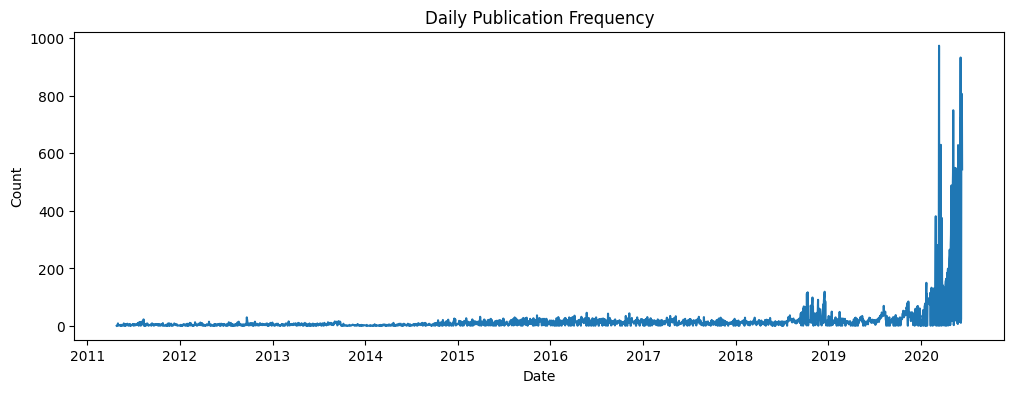

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/raw_analyst_ratings.csv')

# --- FIX THE DATE CONVERSION LINE ---
df['date'] = pd.to_datetime(df['date'], errors='coerce')
# --------------------------------

df['headline'] = df['headline'].fillna("").astype(str)

# Calculate daily publication frequency
daily_count = df.groupby(df['date'].dt.date).size() 

# Plot daily publication frequency
plt.figure(figsize=(12,4))
daily_count.plot()
plt.title("Daily Publication Frequency")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()


-----------------------------------------------
## Publishing Time of Day
-----------------------------------------------

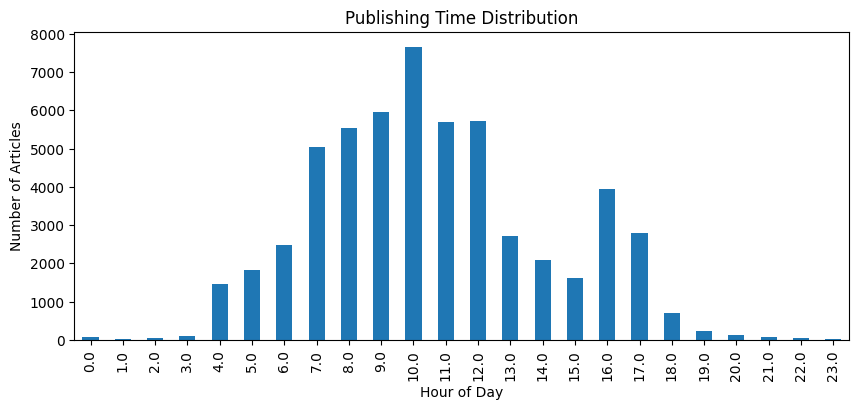

In [4]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/raw_analyst_ratings.csv')
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['hour'] = df['date'].dt.hour

plt.figure(figsize=(10,4))
df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title("Publishing Time Distribution")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Articles")
plt.show()


======================================================
# PUBLISHER ANALYSIS
======================================================

-----------------------------------------------
## Most Active Publishers
-----------------------------------------------

In [10]:
df['publisher'].value_counts().head(10)




publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

## Plot:

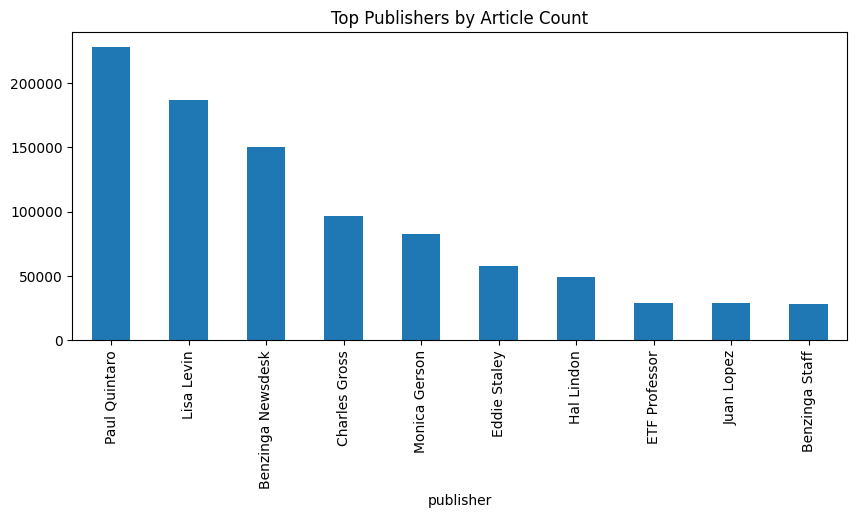

In [7]:
df['publisher'].value_counts().head(10).plot(kind='bar', figsize=(10,4))
plt.title("Top Publishers by Article Count")
plt.show()


-----------------------------------------------
## Compare Average Headline Length Per Publisher
-----------------------------------------------

In [18]:
import pandas as pd
df = pd.read_csv('../data/raw_analyst_ratings.csv')
result = df.groupby('publisher')['headline'].size().sort_values(ascending=False)
print(result)
#df.groupby('publisher')['headline'].mean().sort_values(ascending=False)


publisher
Paul Quintaro             228373
Lisa Levin                186979
Benzinga Newsdesk         150484
Charles Gross              96732
Monica Gerson              82380
                           ...  
MyConstant Chris Roper         1
milesyoung                     1
Nat                            1
mjintertrader                  1
Adam Weiner                    1
Name: headline, Length: 1034, dtype: int64


-----------------------------------------------
## Extract Email Domains
-----------------------------------------------

In [25]:
import pandas as pd
df = pd.read_csv('../data/raw_analyst_ratings.csv')
if 'email' in df.columns:
    df['domain'] = df['email'].str.split('@').str[-1]
    df['domain'].value_counts().head(10)
